In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io

def load_vectors(fname):
    i=0
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    
    for line in fin:
        i+=1
        if i%50000==0:
          break
        tokens = line.rstrip().split(' ')
        data[tokens[0]]=np.array(tokens[1:],dtype=float)
    return data

In [ ]:
f='/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/fastText Hindi wordvec/cc.hi.300.vec'

In [ ]:
vecq=load_vectors(f)

In [ ]:
vecq

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
df_t = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/cleaned_consthinditrain.csv')
df_val = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/cleaned_consthindivalid.csv')

In [ ]:
X_t=df_t['text']

In [ ]:
df_t['bin_label'].unique()

In [ ]:
y=np.array(df_val['bin_label'])

In [ ]:
y[y=='host'].shape

(376,)

In [ ]:
a=vecq['घृणित']
#hateful

In [ ]:
b=vecq['सुखदायक']
#soothing

In [ ]:
c=a-b

In [ ]:
c2=pd.DataFrame(c)


In [ ]:
c2.describe()

0
count  300.000000
mean    -0.001078
std      0.071840
min     -0.274900
25%     -0.050250
50%      0.000450
75%      0.048525
max      0.170900

In [ ]:
q=[]
q2=[]
for i in range(len(c)):
  if c[i]>.145 or c[i]<-.16:
    q+=[i]
    q2+=[i+1]

In [ ]:
c[c>.145]

array([0.1657, 0.161 , 0.1502, 0.1474, 0.1709])

In [ ]:
q2

[2, 6, 27, 36, 76, 95, 102, 185, 243, 257]

In [ ]:
def mod_load_vectors(fname):
    i=0
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    
    for line in fin:
        i+=1
        if i%10000==0:
          print(i)
        tokens = line.rstrip().split(' ')
        data[tokens[0]]=np.array([tokens[2], tokens[6], tokens[27], tokens[36], tokens[76], tokens[95], tokens[102], tokens[185], tokens[243], tokens[257]],dtype=float)
    return data

In [ ]:
vecq2=mod_load_vectors(f)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [ ]:
length=np.zeros([5728])
i=0
for el in X_t:
  length[i]=len(el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '))
  i+=1

In [ ]:
l2=pd.DataFrame(length)

In [ ]:
l2.describe([0.9])

0
count  5728.000000
mean     27.000000
std      18.679789
min       2.000000
50%      22.000000
90%      49.000000
max     415.000000

In [ ]:
o=0
for el in X_t:
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    try:
      f=vecq2[el2]
    except KeyError:
      if el2.strip()!='':
        print(el2.rstrip())
        o+=1

अनलॉक4
जारीसितंबर
होगीसितंबर
इजाजतकंटेनमेंट
नहींसिनेमाहॉल
रहेंगेसे
अजर‌
मसुद
करेंविक्रम
ीवनसंवाद
्लाबोल
quatation
छोड़ेंगेअधिकारी
ासुकूहोंजो
J20
चुदाईखाना
अब्दुलफारुख
केपा
गांधीMaa
करूंगासोनिया
गांधीबेटा
ीरखान
Prayagaj
भारतअमरीका
स्पेशलटीम
अनुच्छेदउप
ोड़फोड़
्ल्स
िखरा
ामान
्य
किच्चा
सबूतपर
मेंजज
उठेऐसी
ोविड19
सोहफे
जागोभारत
दियामुस्लिम
पूजापुत्री
आगेखून
जायेंगीया
पत्नीसाली
पत्नीपरिजनों
चीखेगासुशांत
मिलेगाअभी
लश्करएनोए
पुर्खो
पंचेर
चमचेराहुल
पित्रोदाहुआ
ज्ञानईवेन्टमैनेजमेन्ट
बखानचप्पल
पब्जी
पब्जी
सौरकरण
रूफटाप
ऑक्सीमित्र
कहाफेसबुक
कु७त्तो
दियाआजकल
leftists
यूपीबिहार
यूपीबिहार
हैहिन्दुओं
खरीदनाजय
मेंGovt
जिन्नेश
अभिनंदनपीएम
NEETJEE
ऑक्सीमित्र
ठुईयां
कोविड19
अनलॉक4
कदमFake
चैटबाट
ीतापुर
्मूकश्मीर
ुच्छेद370
ाकिस्तान
ारूकअब्दुल्ला
ुरी
साहूपद
FTSEएप्पल
पबजी
सिर्फ़अंधभक्तखेल
प्रतबंध
्मनिर्भरभारतअभियान
सोहफे
्रधानमंत्री
ंसद
ार
ेता
क्रोफोर्ड
सैनिकयहाँ
ोदीहैतोमुमकिनहै
हैतलाक
Yanha
हमअसरो
लियायदि
सालदर
wksकिसी
पिताकिसी
ाकिस्तान
िंदाबाद
्बूआज़मी
नारेमाननीय
फ्लैटमकान
केजु
ाप
रनौतस्कूल
िल्ली
ोविड19


In [ ]:
o

3100

In [ ]:
ip_len=50
dim=10

In [ ]:
x_t=np.zeros([len(X_t),ip_len,dim])
j=0
for el in X_t:
  
  i=0
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    if i<20:
      try:
        x_t[j][i][:]=vecq2[el2]
        i+=1
      except KeyError:
        continue
    else:
      break
  j+=1

In [ ]:
x_t.shape

(5728, 50, 10)

In [ ]:
y_t=df_t['bin_label']
y_t[y_t!='not']=1
y_t[y_t=='not']=0
y_t=np.array(y_t,dtype=np.int)

In [ ]:
X_v=df_val['text']

In [ ]:
x_v=np.zeros([len(X_v),ip_len,dim])
j=0
for el in X_v:
  
  i=0
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    if i<20:
      try:
        x_v[j][i][:]=vecq2[el2]
        i+=1
      except KeyError:
        continue
    else:
      break
  j+=1

In [ ]:
y_v=df_val['bin_label']
y_v[y_v!='not']=1
y_v[y_v=='not']=0
y_v=np.array(y_v,dtype=np.int)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense, Concatenate,Bidirectional,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import f1_score

In [ ]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.3)

In [ ]:
from keras import backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [ ]:
import tensorflow_addons as tfa 


In [ ]:
def f1_weighted(preds, labels):
    f1_weighted = f1_score(y_true=labels, y_pred=preds, average="weighted")
    return f1_weighted

In [ ]:
#1,64 LSTM
ip=Input([ip_len,dim])
lstm=Bidirectional(LSTM(64,activation='relu'))
op=lstm(ip)
dense=Dense(1,activation='sigmoid')
op=dense(op)
BLSTMmodel=Model(ip,op)
BLSTMmodel.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy())#from_logits=True))
print(BLSTMmodel.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 10)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               38400     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 38,529
Trainable params: 38,529
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
BLSTMmodel.fit(x_t,y_t,epochs=5,verbose=2,batch_size=len(x_t),shuffle=True)

Epoch 1/5
1/1 - 0s - loss: 0.6934
Epoch 2/5
1/1 - 0s - loss: 0.6930
Epoch 3/5
1/1 - 0s - loss: 0.6927
Epoch 4/5
1/1 - 0s - loss: 0.6924
Epoch 5/5
1/1 - 0s - loss: 0.6921


In [ ]:
BLSTMmodel.fit(x_t,y_t,epochs=5,verbose=2,batch_size=len(x_t),shuffle=True)

Epoch 1/5
1/1 - 0s - loss: 0.6918
Epoch 2/5
1/1 - 0s - loss: 0.6915
Epoch 3/5
1/1 - 0s - loss: 0.6912
Epoch 4/5
1/1 - 0s - loss: 0.6909
Epoch 5/5
1/1 - 0s - loss: 0.6906


In [ ]:
#3,64 LSTM
ip=Input((ip_len,dim))
lstm=LSTM(dim,return_sequences=True,return_state=True)
lstm2=LSTM(dim,return_sequences=True,return_state=True)
lstm3=LSTM(dim,return_state=True)
op,_,_=lstm(ip)
op,_,_=lstm2(op)
op,_,_=lstm3(op)
dense=Dense(1,activation='softmax')
op=dense(op)
LSTM3model=Model(ip,op)
LSTM3model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
optimizer=sgd,metrics=[f1])
print(LSTM3model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 10)]          0         
_________________________________________________________________
lstm_1 (LSTM)                [(None, 50, 10), (None, 1 840       
_________________________________________________________________
lstm_2 (LSTM)                [(None, 50, 10), (None, 1 840       
_________________________________________________________________
lstm_3 (LSTM)                [(None, 10), (None, 10),  840       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,531
Trainable params: 2,531
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
LSTM3model.fit(x_t,y_t,epochs=20,verbose=2,validation_split=0.2,batch_size=len(x_t),use_multiprocessing=True,shuffle=True)

Epoch 1/20
1/1 - 1s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 2/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 3/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 4/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 5/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 6/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 7/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 8/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 9/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 10/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 11/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_f1: 0.6430
Epoch 12/20
1/1 - 0s - loss: 0.8473 - f1: 0.6357 - val_loss: 0.8394 - val_

In [ ]:
#3,64 BLSTM
ip=Input((ip_len,dim))
lstm=Bidirectional(dim,return_sequences=True,return_state=True)
lstm2=Bidirectional(dim,return_sequences=True,return_state=True)
lstm3=Bidirectional(dim,return_state=True)
op,_,_,_,_=lstm(ip)
op,_,_,_,_=lstm2(op)
op,_,_,_,_=lstm3(op)
dense=Dense(1,activation='softmax')
op=dense(op)
BLSTM3model=Model(ip,op)
BLSTM3model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
optimizer=sgd,metrics=[f1])
print(BLSTM3model.summary())

In [ ]:
BLSTM3model.fit(x_t,y_t,epochs=20,verbose=2,validation_split=0.2,batch_size=1,use_multiprocessing=True,shuffle=True)

### You can use this code for classification (simple classifier) instead of LSTM model, once you get embeddings of vectors for each tweet (X_train are feature vectors and y_train are labels for them. Similarly, with x-val & y-val

In [ ]:
dim=10

##Basic Classification Classical Algos

In [ ]:
x_t2=np.zeros([len(X_t),dim])
j=0
for el in X_t:
  
  i=0
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    try:
      x_t2[j][:]+=vecq2[el2]
      i+=1
    except KeyError:
      continue
  x_t2[j]/=i
  
  j+=1

NameError: ignored

In [ ]:
x_v2=np.zeros([len(X_v),dim])
j=0
for el in X_v:
  
  i=0
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    try:
      x_v2[j][:]+=vecq2[el2]
      i+=1
    except KeyError:
      continue
  x_v2[j]/=i
  
  j+=1

In [ ]:
print(x_t.shape,x_t2.shape,y_t.shape,y_v.shape,x_v.shape,x_v2.shape,)

(5728, 50, 10) (5728, 10) (5728,) (811,) (811, 50, 10) (811, 10)


In [ ]:
df_t['bin_label']

0       1
1       0
2       0
3       1
4       0
       ..
5723    1
5724    0
5725    0
5726    1
5727    0
Name: bin_label, Length: 5728, dtype: object

In [ ]:
y_t

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
y_v

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import pandas as pd

#X =  np.load('/content/drive/My Drive/HASOC2020/stuff/Data/tanglish_tamil_script_xlmr_embeds.npy')
#y =  pd.read_excel('/content/drive/My Drive/HASOC2020/Task-2/tanglish_farm.xlsx')['label'].astype(int)
X_train, X_val, y_train, y_val = train_test_split(x_t2,y_t,test_size=0.2,random_state=42)#stratify=y

classifier =    LogisticRegression()#MLPClassifier()
#x_t2,x_v2,y_t,y_v
#model = simpleClassifier(X_train, X_val, y_train, y_val,test_size=0.2,is_stratified=True,classifier=classifier)
#mod = classifierwithGS(x_t2,x_v2,y_t,y_v,test_size=0.2,is_stratified=True,classifier=classifier)
exhaustiveClassifierSearch(X_train, X_val, y_train, y_val,0.2,True)

Streaming output truncated to the last 5000 lines.
269:	learn: 0.4860940	total: 1.6s	remaining: 4.34s
270:	learn: 0.4856995	total: 1.61s	remaining: 4.33s
271:	learn: 0.4855206	total: 1.62s	remaining: 4.33s
272:	learn: 0.4852212	total: 1.62s	remaining: 4.32s
273:	learn: 0.4849069	total: 1.63s	remaining: 4.31s
274:	learn: 0.4845209	total: 1.63s	remaining: 4.3s
275:	learn: 0.4843635	total: 1.65s	remaining: 4.33s
276:	learn: 0.4840165	total: 1.66s	remaining: 4.32s
277:	learn: 0.4837823	total: 1.66s	remaining: 4.32s
278:	learn: 0.4834636	total: 1.67s	remaining: 4.31s
279:	learn: 0.4832814	total: 1.67s	remaining: 4.3s
280:	learn: 0.4830329	total: 1.68s	remaining: 4.3s
281:	learn: 0.4828619	total: 1.69s	remaining: 4.3s
282:	learn: 0.4827033	total: 1.69s	remaining: 4.29s
283:	learn: 0.4824168	total: 1.7s	remaining: 4.28s
284:	learn: 0.4822981	total: 1.7s	remaining: 4.28s
285:	learn: 0.4820717	total: 1.71s	remaining: 4.27s
286:	learn: 0.4817856	total: 1.72s	remaining: 4.26s
287:	learn: 0.481602

logisitc 1- 0.64 weighted f1

In [ ]:
def simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    print("----------Accuracy------------\n")
    print(accuracy_score(y_true=y_val,y_pred=y_pred))
    print("----------Confusion Matrix------------\n")
    print(confusion_matrix(y_true=y_val,y_pred=y_pred))
    print("----------Classification Report------------\n")
    print(classification_report(y_true=y_val,y_pred=y_pred))
  except Exception as e:
    print(e)
  
  # return classifier

def gs(classifier,parameters,cv_fold,X_train,y_train):
  grid_search = GridSearchCV(classifier,param_grid=parameters,cv=StratifiedKFold(n_splits=cv_fold).split(X_train,y_train),verbose=2)
  model = grid_search.fit(X_train, y_train)
  print('Cross Validation Results:')
  print(model.cv_results_)
  return model

def classifierwithGS(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # These params are valid only for logreg & similar type of classifiers 
  # parameters = [{"C":[1.0,10.0,20.0,40.0], "penalty":["l1","l2","elasticnet","none"],"solver":['liblinear','lbfgs','newton-cg', 'lbfgs', 'sag', 'saga'],"max_iter":[4000]}]
  parameters = {'solver': ['lbfgs','sgd','adam'], 'max_iter': [2000], 'alpha': 10.0 ** -np.arange(2, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1],'early_stopping':[True]}
  # 1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,   10 for alpha ,2,3,4,5,6,7,8,9 for random_state
  cv_fold = 5
  # X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
  model = gs(classifier,parameters,cv_fold,X_train,y_train) 
  return model
  # bestparams = model.best_params_
  # print("Best params: ",bestparams)
  # logreg = LogisticRegression(C=bestparams["C"],max_iter=bestparams["max_iter"],solver=bestparams["solver"],penalty=bestparams["penalty"])
  # y_pred = logreg.predict(X_val)
  

  print("----------Accuracy------------\n")
  print(accuracy_score(y_true=y_val,y_pred=y_pred))
  print("----------Confusion Matrix------------\n")
  print(confusion_matrix(y_true=y_val,y_pred=y_pred))
  print("----------Classification Report------------\n")
  print(classification_report(y_true=y_val,y_pred=y_pred))

def exhaustiveClassifierSearch(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report

  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  
  for classifier in classifiers:
    print(str(classifier),'\n')
    simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)
  



###xlmr-embeds

###XLM-R Embeddings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install hydra

In [ ]:
!pip install hydra-core

In [ ]:
!pip install sentencepiece
!pip install numpy==1.16.1
import warnings
import torch
import numpy as np

In [ ]:
import pandas as pd
df_t = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/cleaned_consthinditrain.csv')
df_val = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/cleaned_consthindivalid.csv')

In [ ]:
!pip install flair

from flair.embeddings import TransformerWordEmbeddings
from flair.data import Sentence



In [ ]:
##@title
def get_and_save_xlmr_embeddings(data,save_as_path): 
  """
  data has to be in it's native script (?)
  """
  
  warnings.filterwarnings("ignore", message="numpy.dtype size changed")
  warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

  xlmr = torch.hub.load('pytorch/fairseq', 'xlmr.large')
  xlmr.eval()

  with torch.no_grad():   #else it's computing grads for features 
    xlmr_emb_size = 1024
    embeds = np.zeros(shape=(len(data),xlmr_emb_size))
    for i in range(len(data)):
      sentence = data[i]
      tokens = xlmr.encode(sentence)
      features = xlmr.extract_features(tokens)
      features = torch.mean(features,dim=1)   #Averaging across all the words
      embeds[i] = features.numpy()
      if(i%100==0):
        print("Completed {}/{} ".format(i,len(data)))
  
  np.save(save_as_path,embeds)
     



In [ ]:
xx_t=df_val['text']

In [ ]:
xx_t2=[]
j=0
for el in xx_t:
  xx_t2+=[' '.join(xx_t[j].replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' ')[:50])]
  j+=1

In [ ]:
max=0
for el in xx_t2:
  if len(el.split(' '))>max:
    max=len(el)
max

93

In [ ]:
get_and_save_xlmr_embeddings(xx_t2,save_as_path='/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/fastextHINDI_xlmr_embedsVal.npy')

Using cache found in /root/.cache/torch/hub/pytorch_fairseq_master


Completed 0/811 
Completed 100/811 
Completed 200/811 
Completed 300/811 
Completed 400/811 
Completed 500/811 
Completed 600/811 
Completed 700/811 
Completed 800/811 


In [ ]:
xvec=np.load('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/fastextHINDI_xlmr_embedsTrain.npy')

In [ ]:
xvvec=np.load('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/fastextHINDI_xlmr_embedsVal.npy')

##Basic Classification Classical Algos

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import pandas as pd

#X =  np.load('/content/drive/My Drive/HASOC2020/stuff/Data/tanglish_tamil_script_xlmr_embeds.npy')
#y =  pd.read_excel('/content/drive/My Drive/HASOC2020/Task-2/tanglish_farm.xlsx')['label'].astype(int)
#X_train, X_val, y_train, y_val = train_test_split(xvec,y,test_size=0.2,stratify=y,random_state=42)

# classifier = MLPClassifier()#LogisticRegression()
# model = simpleClassifier(X_train,X_val,y_train,y_val,test_size=0.2,is_stratified=True,classifier=classifier)
# mod = classifierwithGS(X_train,X_val,y_train,y_val,test_size=0.2,is_stratified=True,classifier=classifier)
exhaustiveClassifierSearch(xvec,xvvec,df_t['bin_label'],df_val['bin_label'],0.2,True)

     |████████████████████████████████| 66.2MB 134kB/s 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

Negative values in data passed to MultinomialNB (input X)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 

----------Accuracy------------

0.7620221948212084
----------Confusion Matrix------------

[[281  95]
 [ 98 337]]
----------Classification Report------------

              precision    recall  f1-score   support

        host       0.74      0.75      0.74       376
         not       0.78      0.77      0.78       435

    accuracy                           0.76       811
   macro avg       0.76      0.76      0.76       811
weighted avg       0.76      0.76      0.76       811

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_le

In [ ]:
def simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    print("----------Accuracy------------\n")
    print(accuracy_score(y_true=y_val,y_pred=y_pred))
    print("----------Confusion Matrix------------\n")
    print(confusion_matrix(y_true=y_val,y_pred=y_pred))
    print("----------Classification Report------------\n")
    print(classification_report(y_true=y_val,y_pred=y_pred))
  except Exception as e:
    print(e)
  
  # return classifier

def gs(classifier,parameters,cv_fold,X_train,y_train):
  grid_search = GridSearchCV(classifier,param_grid=parameters,cv=StratifiedKFold(n_splits=cv_fold).split(X_train,y_train),verbose=2)
  model = grid_search.fit(X_train, y_train)
  print('Cross Validation Results:')
  print(model.cv_results_)
  return model

def classifierwithGS(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # These params are valid only for logreg & similar type of classifiers 
  # parameters = [{"C":[1.0,10.0,20.0,40.0], "penalty":["l1","l2","elasticnet","none"],"solver":['liblinear','lbfgs','newton-cg', 'lbfgs', 'sag', 'saga'],"max_iter":[4000]}]
  parameters = {'solver': ['lbfgs','sgd','adam'], 'max_iter': [2000], 'alpha': 10.0 ** -np.arange(2, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1],'early_stopping':[True]}
  # 1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,   10 for alpha ,2,3,4,5,6,7,8,9 for random_state
  cv_fold = 5
  # X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
  model = gs(classifier,parameters,cv_fold,X_train,y_train) 
  return model
  # bestparams = model.best_params_
  # print("Best params: ",bestparams)
  # logreg = LogisticRegression(C=bestparams["C"],max_iter=bestparams["max_iter"],solver=bestparams["solver"],penalty=bestparams["penalty"])
  # y_pred = logreg.predict(X_val)
  

  print("----------Accuracy------------\n")
  print(accuracy_score(y_true=y_val,y_pred=y_pred))
  print("----------Confusion Matrix------------\n")
  print(confusion_matrix(y_true=y_val,y_pred=y_pred))
  print("----------Classification Report------------\n")
  print(classification_report(y_true=y_val,y_pred=y_pred))

def exhaustiveClassifierSearch(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report

  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  
  for classifier in classifiers:
    print(str(classifier),'\n')
    simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)
  



FLAIR

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_t = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/cleaned_consthinditrain.csv')
df_val = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/cleaned_consthindivalid.csv')

In [ ]:
X_t=df_t['text']

In [ ]:
X_v=df_val['text']

In [ ]:
!pip install flair

     |████████████████████████████████| 337kB 5.8MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 1.1MB 26.8MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 798kB 44.7MB/s 
     |████████████████████████████████| 983kB 43.2MB/s 
     |████████████████████████████████| 1.3MB 37.3MB/s 
     |████████████████████████████████| 2.9MB 40.1MB/s 
     |████████████████████████████████| 890kB 42.2MB/s 
  Created wheel for ftfy: filename=ftfy-5.8-cp36-none-any.whl size=45612 sha256=c04f672d12d653436f32bdc6a2aa23636eea9123de3e50de58a23c28a59b3241
  Stored in directory: /root/.cache/pip/wheels/ba/c0/ef/f28c4da5ac84a4e06ac256ca9182fc34fa57fefffdbc68425b
  Created wheel for segtok: filename=segtok-1.5.10-cp36-none-any.whl size=25021 sha256=f923e64277f28dc1e98c1841a4934e51a1a4bd707897ce99b5f274d10fffcab8
  Stored in directory: /root/.cache/pip/wheels/b4/39/f6/9ca1c5cabde964d728023b5751c3a206a5c8cc4

In [ ]:
from flair.embeddings import FlairEmbeddings, TransformerWordEmbeddings

# init Flair embeddings
flair_forward_embedding = FlairEmbeddings('multi-forward')
flair_backward_embedding = FlairEmbeddings('multi-backward')

# init multilingual BERT
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')

2020-11-12 14:45:23,137 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-forward-v0.1.pt not found in cache, downloading to /tmp/tmp6f2wf610


100%|██████████| 172513724/172513724 [01:09<00:00, 2472304.63B/s]

2020-11-12 14:46:33,779 copying /tmp/tmp6f2wf610 to cache at /root/.flair/embeddings/lm-jw300-forward-v0.1.pt


2020-11-12 14:46:34,161 removing temp file /tmp/tmp6f2wf610
2020-11-12 14:46:36,327 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-backward-v0.1.pt not found in cache, downloading to /tmp/tmpdv4z2gj_


100%|██████████| 172513724/172513724 [00:18<00:00, 9097167.84B/s]

2020-11-12 14:46:56,129 copying /tmp/tmpdv4z2gj_ to cache at /root/.flair/embeddings/lm-jw300-backward-v0.1.pt


2020-11-12 14:46:56,550 removing temp file /tmp/tmpdv4z2gj_


In [ ]:
from flair.data import Sentence
s=Sentence(X_t[0])

In [ ]:
X_t[0]

'मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है  जय श्री राम '

In [ ]:
s

Sentence: "मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है जय श्री राम"   [− Tokens: 22]

In [ ]:
from flair.embeddings import StackedEmbeddings

# now create the StackedEmbedding object that combines all embeddings
stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_forward_embedding, flair_backward_embedding, bert_embedding])

In [ ]:
stacked_embeddings.embed(s)

In [ ]:
s[0].embedding.shape

torch.Size([7168])

In [ ]:
import torch

In [ ]:
v_t=torch.zeros([len(X_t),7168])
i=0
for el in X_t:
  el=Sentence(el)
  stacked_embeddings.embed(el)
  j=0
  for e in el:
    v_t[i]+=e.embedding
    j+=1
  v_t[i]/=j
  i+=1
  if i%100==0:
    print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700


In [ ]:
v_t[0]

tensor([ 9.0743e-03, -9.3677e-04,  4.5644e-03,  ...,  1.0781e+00,
        -1.7158e-01,  2.7314e-01])

In [ ]:
vtn=v_t.numpy()
np.save('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/flair_stacked_flair_bert_train.npy',vtn)

In [ ]:
v_v=torch.zeros([len(X_v),7168])
i=0
for el in X_v:
  el=Sentence(el)
  stacked_embeddings.embed(el)
  j=0
  for e in el:
    v_v[i]+=e.embedding
    j+=1
  v_v[i]/=j
  i+=1
  if i%100==0:
    print(i)

100
200
300
400
500
600
700
800


In [ ]:
vvn=v_v.numpy()
np.save('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/flair_stacked_flair_bert_val.npy',vvn)

In [ ]:
def simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    print("----------Accuracy------------\n")
    print(accuracy_score(y_true=y_val,y_pred=y_pred))
    print("----------Confusion Matrix------------\n")
    print(confusion_matrix(y_true=y_val,y_pred=y_pred))
    print("----------Classification Report------------\n")
    print(classification_report(y_true=y_val,y_pred=y_pred))
  except Exception as e:
    print(e)
  
  # return classifier

def gs(classifier,parameters,cv_fold,X_train,y_train):
  grid_search = GridSearchCV(classifier,param_grid=parameters,cv=StratifiedKFold(n_splits=cv_fold).split(X_train,y_train),verbose=2)
  model = grid_search.fit(X_train, y_train)
  print('Cross Validation Results:')
  print(model.cv_results_)
  return model

def classifierwithGS(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # These params are valid only for logreg & similar type of classifiers 
  # parameters = [{"C":[1.0,10.0,20.0,40.0], "penalty":["l1","l2","elasticnet","none"],"solver":['liblinear','lbfgs','newton-cg', 'lbfgs', 'sag', 'saga'],"max_iter":[4000]}]
  parameters = {'solver': ['lbfgs','sgd','adam'], 'max_iter': [2000], 'alpha': 10.0 ** -np.arange(2, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1],'early_stopping':[True]}
  # 1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,   10 for alpha ,2,3,4,5,6,7,8,9 for random_state
  cv_fold = 5
  # X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
  model = gs(classifier,parameters,cv_fold,X_train,y_train) 
  return model
  # bestparams = model.best_params_
  # print("Best params: ",bestparams)
  # logreg = LogisticRegression(C=bestparams["C"],max_iter=bestparams["max_iter"],solver=bestparams["solver"],penalty=bestparams["penalty"])
  # y_pred = logreg.predict(X_val)
  

  print("----------Accuracy------------\n")
  print(accuracy_score(y_true=y_val,y_pred=y_pred))
  print("----------Confusion Matrix------------\n")
  print(confusion_matrix(y_true=y_val,y_pred=y_pred))
  print("----------Classification Report------------\n")
  print(classification_report(y_true=y_val,y_pred=y_pred))

def exhaustiveClassifierSearch(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report

  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  
  for classifier in classifiers:
    print(str(classifier),'\n')
    simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)
  



In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import pandas as pd

#X =  np.load('/content/drive/My Drive/HASOC2020/stuff/Data/tanglish_tamil_script_xlmr_embeds.npy')
#y =  pd.read_excel('/content/drive/My Drive/HASOC2020/Task-2/tanglish_farm.xlsx')['label'].astype(int)
#X_train, X_val, y_train, y_val = train_test_split(xvec,y,test_size=0.2,stratify=y,random_state=42)

# classifier = MLPClassifier()#LogisticRegression()
# model = simpleClassifier(X_train,X_val,y_train,y_val,test_size=0.2,is_stratified=True,classifier=classifier)
# mod = classifierwithGS(X_train,X_val,y_train,y_val,test_size=0.2,is_stratified=True,classifier=classifier)
exhaustiveClassifierSearch(vtn,vvn,df_t['bin_label'],df_val['bin_label'],0.2,True)

     |████████████████████████████████| 66.2MB 54kB/s 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

Negative values in data passed to MultinomialNB (input X)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 

----------Accuracy------------

0.7570900123304563
----------Confusion Matrix------------

[[279  97]
 [100 335]]
----------Classification Report------------

              precision    recall  f1-score   support

        host       0.74      0.74      0.74       376
         not       0.78      0.77      0.77       435

    accuracy                           0.76       811
   macro avg       0.76      0.76      0.76       811
weighted avg       0.76      0.76      0.76       811

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_lea

# Multilabel


In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score
def f1_weighted(preds, labels):
    f1_weighted = f1_score(y_true=labels, y_pred=preds, average="weighted",labels=classf)
    return f1_weighted

###Tweet-pre-processing 

In [ ]:
!pip install tweet-preprocessor -q
!pip install emoji -q

#https://pypi.org/project/tweet-preprocessor/


     |████████████████████████████████| 51kB 2.5MB/s 


In [ ]:
classf=['hate','offensive','defamation','fake']

In [ ]:
import preprocessor as p
import emoji
import re
import string
from gensim.parsing.preprocessing import remove_stopwords
punctuation_with_exceptions = list(string.punctuation)
punctuation_with_exceptions = [chr  for chr in punctuation_with_exceptions if(chr!='.' and chr!=',')]


p.set_options(p.OPT.NUMBER,p.OPT.URL,p.OPT.MENTION,p.OPT.HASHTAG)

# Available Options: Option Name	Option Short Code URL	p.OPT.URL Mention	p.OPT.MENTION Hashtag	p.OPT.HASHTAG Reserved Words	p.OPT.RESERVED Emoji	p.OPT.EMOJI Smiley	p.OPT.SMILEY Number	p.OPT.NUMBER

def prepro_tweet(row):
    text_before_prepro = row['text']
    text_before_prepro = p.clean(text_before_prepro)
    return text_before_prepro

def deEmojify(row):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', row['text'])

def remove_RT(row):  # more of these symbols are created by emoji_to_text_before_prepro()
  text_before_prepro = row['text']
  text_before_prepro = text_before_prepro.replace('RT', ' ')
  return text_before_prepro


def punct_except_fullstop_comma(row):
  text_before_prepro = row['text']
  for char in punctuation_with_exceptions:
    text_before_prepro = text_before_prepro.replace(char, '')
  return text_before_prepro
def multiclass(row):
  lab=row['Labels Set'].split(',')
  h=0.0
  o=0.0
  f=0.0
  d=0.0
  if 'hate' in lab:
    h=1.0
  if 'offensive' in lab:
    o=1.0
  if 'fake' in lab:
    f=1.0
  if 'defamation' in lab:
    d=1.0
  return [h,o,d,f]
def preprocess(df):
  df = df.assign(text = [ sent for sent in df['Post']])
  for i in range(len(classf)-1,-1,-1):
    df.insert(2,classf[i],np.zeros(df.shape[0]))
  df['text'] = df.apply(prepro_tweet, axis=1)
  df['text'] = df.apply(remove_RT, axis=1)
  df['text'] = df.apply(punct_except_fullstop_comma, axis=1)
  df['text'] = df.apply(deEmojify,axis=1)

  return df

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/consthinditrain.csv')
print(df.columns)
df1 = df[['Post','Labels Set']]
df2 = preprocess(df1)
df2['hate'],df2['offensive'],df2['defamation'],df2['fake']=zip(*df2.apply(multiclass,axis=1))
df2=df2[['text','Labels Set','hate','offensive','defamation','fake']]
#df1 = df1[['text','bin_label']]
# df1.rename(columns={'text_before_prepro':'text'},inplace=True)
df2
#df2.to_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/MCconsthinditrain.csv',index=False)

Index(['Unique ID', 'Post', 'Labels Set', 'bin_label'], dtype='object')


text  ... fake
0     मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...  ...  0.0
1     सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...  ...  0.0
2     सुशांत ने जो बिजनेस डील जून को की थी, वो डील द...  ...  0.0
3     साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते ...  ...  0.0
4      अनलॉक4 के लिए गाइडलाइन्स जारी  सितंबर से देशभ...  ...  0.0
...                                                 ...  ...  ...
5723  उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ क...  ...  0.0
5724  उप्र पीएम रिपोर्ट में खुलासा हार्टअटैक से हुई ...  ...  0.0
5725  नौकरी गंवा चुके दोस्त की मदद नगद के बजाए गिफ्ट...  ...  0.0
5726  बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...  ...  1.0
5727  रक्षा मंत्री ने पूर्व राष्ट्रपति के निधन पर शो...  ...  0.0

[5728 rows x 6 columns]

In [ ]:
X_t=df2['text']

In [ ]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
counts=[]
for i in classf:
    counts.append((i, df2[i].sum()))
counts

[('hate', 792.0),
 ('offensive', 742.0),
 ('defamation', 564.0),
 ('fake', 1144.0)]

In [ ]:
rowsums = df2.iloc[:,2:6].sum(axis=1)
x=rowsums.value_counts()
x

0.0    3050
1.0    2197
2.0     407
3.0      65
4.0       9
dtype: int64

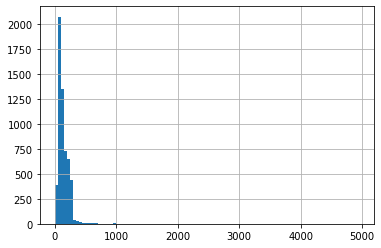

In [ ]:
lens = df2.text.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [ ]:
print('Number of missing comments in comment text:')
df2['text'].isnull().sum()

Number of missing comments in comment text:


0

In [ ]:
train, test = train_test_split(df2, random_state=42, test_size=0.33, shuffle=True)
X_train = train.text
X_test = test.text
print(X_train.shape)
print(X_test.shape)

(3837,)
(1891,)


In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
NBp=[]
i=0
for category in classf:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    NBp+=[prediction]
    i+=1
    print(test[category].shape,prediction.shape)
    print('Test f1 is {}'.format(f1_score(test[category], prediction)))
    print('Test precision is {}'.format(precision_score(test[category], prediction)))
    print('Test recall is {}'.format(recall_score(test[category], prediction)))

... Processing hate
(1891,) (1891,)
Test f1 is 0.0
Test precision is 0.0
Test recall is 0.0
... Processing offensive
(1891,) (1891,)
Test f1 is 0.0
Test precision is 0.0
Test recall is 0.0
... Processing defamation
(1891,) (1891,)
Test f1 is 0.0
Test precision is 0.0
Test recall is 0.0
... Processing fake
(1891,) (1891,)
Test f1 is 0.02
Test precision is 0.8
Test recall is 0.010126582278481013


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
i=0
NBf=f1_weighted(np.array(NBp).T,test[classf])
NBf

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: ignored

In [ ]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
SVCp=np.empty([test.shape[0],4])
i=0
for category in classf:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    SVCp[:,i]=prediction
    i+=1
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing hate
Test accuracy is 0.8524590163934426
... Processing offensive
Test accuracy is 0.8730830248545743
... Processing defamation
Test accuracy is 0.886832363828662
... Processing fake
Test accuracy is 0.8096245372818615


In [ ]:
SVCf=f1_weighted(SVCp,test[classf])
SVCf

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: ignored

In [ ]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
LRp=[]
i=0
for category in classf:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    LRp+=[prediction]
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing hate
Test accuracy is 0.8646218931782126
... Processing offensive
Test accuracy is 0.878900052882073
... Processing defamation
Test accuracy is 0.8984664198836594
... Processing fake
Test accuracy is 0.8090957165520889


In [ ]:
np.array(LRp).shape

(4, 1891)

In [ ]:
lr=np.array(LRp).T
LRf=f1_weighted(np.array(LRp),np.array(test[classf]))
LRf

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


0.08325581395348837

In [ ]:
lr.shape,test[classf].shape

((1891, 4), (1891, 4))

In [ ]:
y_true = np.array([[0,0,0,0], [1,1,1,0], [1,1,1,1]])
y_pred = np.array([[0,0,0,0], [1,1,1,0], [1,1,1,1]])

f1_score(y_true=y_true, y_pred=y_pred, average='weighted',labels=[1,2,3])


(3, 4)

try 2

In [ ]:
import io

def load_vectors(fname):
    i=0
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    
    for line in fin:
        i+=1
        if i%50000==0:
          break
        tokens = line.rstrip().split(' ')
        data[tokens[0]]=np.array(tokens[1:],dtype=float)
    return data

In [ ]:
f='/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/fastText Hindi wordvec/cc.hi.300.vec'

In [ ]:
vecq=load_vectors(f)

In [ ]:
vecq

{'के': array([ 2.070e-02,  4.200e-03,  5.500e-03,  1.200e-02, -3.800e-03,
        -4.390e-02,  6.600e-02,  1.706e-01, -2.700e-03, -3.890e-02,
         8.400e-03,  3.200e-02,  3.980e-02,  1.740e-02, -6.800e-03,
        -1.430e-02, -9.180e-02,  3.060e-02, -8.600e-03,  3.223e-01,
         3.500e-02,  2.430e-02, -2.340e-02,  9.110e-02, -2.590e-02,
        -8.100e-03, -4.620e-02,  3.122e-01,  2.620e-02, -7.200e-03,
         2.000e-04,  9.500e-03,  4.210e-02, -2.410e-02,  7.360e-02,
         1.700e-02,  6.810e-02,  3.700e-02,  2.680e-02, -3.660e-02,
         2.050e-02,  2.110e-02, -1.600e-03, -2.270e-02, -5.880e-02,
        -6.350e-02, -9.600e-03,  5.570e-02, -2.340e-02,  1.170e-02,
         5.500e-03, -2.680e-02, -2.260e-02, -6.520e-02, -4.830e-02,
         3.000e-03, -2.180e-02, -4.790e-02, -4.610e-02, -2.430e-02,
        -6.150e-02, -1.235e-01, -8.270e-02,  5.350e-02,  5.210e-02,
         6.970e-02, -9.000e-03, -1.550e-02,  2.830e-02, -5.120e-02,
        -1.046e-01,  2.644e-01, -5.900e-03

In [ ]:
import pandas as pd
df_t = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/MCconsthinditrain.csv')


In [ ]:
X_t=df_t['text']

In [ ]:
y_t=df_t[classf]

In [ ]:
a=vecq['घृणित']
#hateful

In [ ]:
b=vecq['सुखदायक']
#soothing

In [ ]:
c=a-b

In [ ]:
c2=pd.DataFrame(c)


In [ ]:
c2.describe()

0
count  300.000000
mean    -0.001078
std      0.071840
min     -0.274900
25%     -0.050250
50%      0.000450
75%      0.048525
max      0.170900

In [ ]:
q=[]
q2=[]
for i in range(len(c)):
  if c[i]>.145 or c[i]<-.16:
    q+=[i]
    q2+=[i+1]

In [ ]:
c[c>.145]

array([0.1657, 0.161 , 0.1502, 0.1474, 0.1709])

In [ ]:
q2

[2, 6, 27, 36, 76, 95, 102, 185, 243, 257]

In [ ]:
def mod_load_vectors(fname):
    i=0
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    
    for line in fin:
        i+=1
        if i%10000==0:
          print(i)
        tokens = line.rstrip().split(' ')
        data[tokens[0]]=np.array([tokens[2], tokens[6], tokens[27], tokens[36], tokens[76], tokens[95], tokens[102], tokens[185], tokens[243], tokens[257]],dtype=float)
    return data

In [ ]:
vecq2=mod_load_vectors(f)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [ ]:
train, test = train_test_split(df_t, random_state=42, test_size=0.33, shuffle=True)

In [ ]:
X_t=train['text']
y_t=train[classf]
X_v=test['text']
y_v=test[classf]

3837

In [ ]:
length=np.zeros([X_t.shape[0]])
i=0
for el in X_t:
  length[i]=len(el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '))
  i+=1

In [ ]:
l2=pd.DataFrame(length)

In [ ]:
l2.describe([0.9])

0
count  3837.000000
mean     26.955434
std      18.033376
min       2.000000
50%      22.000000
90%      49.000000
max     296.000000

In [ ]:
o=0
for el in X_t:
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    try:
      f=vecq2[el2]
    except KeyError:
      if el2.strip()!='':
        print(el2.rstrip())
        o+=1

एंतानियो
हैमिलिए
अमेरिकारूस
करोनौरत्न
BPCLसरकार
अफजलकसाब
कॉरॉना
लुप्पो
हैकंगना
रनौततुने
क्याकाल्पनिकता
₹500
गैरयौगिक
कोविड
रसोड़े
लश्करएनोए
IItalian
Nनंगी
Cकमीनी
Pपार्टी
अल्लाहहुअकबरउनके
अल्लाहहुअकबर
्लाहहू
ॉकडाउन
अपडेट्सः
ाममंदिर
ढोलनगाड़े
क्वॉरंटीन
सीएममंत्रिमंडल
राज्योंकेंद्र
जबGDP
मिलेगीभैया
कोविड19
फ़ेंकू
करेंगेयही
ांग्रेसमुक्तभारत
सालाआप
छततिस
SUPPONRC
देअंड़भक्त
दीजिएकोरोना
SourceNewstrack
मरजू
ततड़–ततड़
इंडोएशियन
हिंदूओंतुम्हारी
बहनबेटियां
तोबहुतबहुत
श्रमरोजगार
कंजरीवाल
कियामजहब
PMCARE
इसलिएI
ट्रस्टसोसाइटी
रजिस्ट्रेशनइनकम
PMCARE
सरकारकितने
थेBMC
ाकएरत्न
ओउल
June2020
जापानअमेरिकाजर्मनीकनाडाइटलीफ्रांसब्रिटेन
ुर
ाजमन्दिर
िनेमाहॉल
्राइड
िया
फिल्मेंाजस्थान
अनुसारशुक्रवार
भूरामलराजमल
लेनानफरत
मोदीशिक्षा
चाहिएअपडेट्स
ThokKe
Himat
Gohel
गंडमारे
बतेगा
लुकमलेश
कूतिया
रहेगासुप्रीम
मामूभांजी
जंबूद्वीपभारतथा
ीम
quatation
ॉटी
पोषणउत्तर
हैआपराधिक
जिम्मेदारीप्रधानमंत्री
चुदाईखाना
अब्दुलफारुख
सालयान
किस्तvia
ुजनोंकाशासनलायेंगे
अपराधीशराब
धारा141
्रीराम
टिकटाक
किमजोन
गांवचट्ठा
नन्हेड़ाजिलासंगरुर

In [ ]:
o

3100

In [ ]:
ip_len=50
dim=10

In [ ]:
x_t=np.zeros([len(X_t),ip_len,dim])
j=0
for el in X_t:
  
  i=0
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    if i<20:
      try:
        x_t[j][i][:]=vecq2[el2]
        i+=1
      except KeyError:
        continue
    else:
      break
  j+=1

In [ ]:
x_t.shape

(5728, 50, 10)

In [ ]:
x_v=np.zeros([len(X_v),ip_len,dim])
j=0
for el in X_v:
  
  i=0
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    if i<20:
      try:
        x_v[j][i][:]=vecq2[el2]
        i+=1
      except KeyError:
        continue
    else:
      break
  j+=1

In [ ]:
def f1_weighted(preds, labels):
    f1_weighted = f1_score(y_true=labels, y_pred=preds, average="weighted")
    return f1_weighted

##Basic Classification Classical Algos

In [ ]:
dim=10

In [ ]:
x_t2=np.zeros([len(X_t),dim])
j=0
for el in X_t:
  
  i=0
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    try:
      x_t2[j][:]+=vecq2[el2]
      i+=1
    except KeyError:
      continue
  x_t2[j]/=i
  
  j+=1

In [ ]:
x_v2=np.zeros([len(X_v),dim])
j=0
for el in X_v:
  
  i=0
  for el2 in el.replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' '):
    try:
      x_v2[j][:]+=vecq2[el2]
      i+=1
    except KeyError:
      continue
  x_v2[j]/=i
  
  j+=1

In [ ]:
def simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    print("----------Accuracy------------\n")
    print(accuracy_score(y_true=y_val,y_pred=y_pred))
    print("----------Confusion Matrix------------\n")
    print(confusion_matrix(y_true=y_val,y_pred=y_pred))
    print("----------Classification Report------------\n")
    print(classification_report(y_true=y_val,y_pred=y_pred))
    return f1_score(y_true=y_val,y_pred=y_pred)
  
  except Exception as e:
    print(e)
  
  # return classifier

def gs(classifier,parameters,cv_fold,X_train,y_train):
  grid_search = GridSearchCV(classifier,param_grid=parameters,cv=StratifiedKFold(n_splits=cv_fold).split(X_train,y_train),verbose=2)
  model = grid_search.fit(X_train, y_train)
  print('Cross Validation Results:')
  print(model.cv_results_)
  return model

def classifierwithGS(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # These params are valid only for logreg & similar type of classifiers 
  # parameters = [{"C":[1.0,10.0,20.0,40.0], "penalty":["l1","l2","elasticnet","none"],"solver":['liblinear','lbfgs','newton-cg', 'lbfgs', 'sag', 'saga'],"max_iter":[4000]}]
  parameters = {'solver': ['lbfgs','sgd','adam'], 'max_iter': [2000], 'alpha': 10.0 ** -np.arange(2, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1],'early_stopping':[True]}
  # 1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,   10 for alpha ,2,3,4,5,6,7,8,9 for random_state
  cv_fold = 5
  # X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
  model = gs(classifier,parameters,cv_fold,X_train,y_train) 
  return model
  # bestparams = model.best_params_
  # print("Best params: ",bestparams)
  # logreg = LogisticRegression(C=bestparams["C"],max_iter=bestparams["max_iter"],solver=bestparams["solver"],penalty=bestparams["penalty"])
  # y_pred = logreg.predict(X_val)
  

  print("----------Accuracy------------\n")
  print(accuracy_score(y_true=y_val,y_pred=y_pred))
  print("----------Confusion Matrix------------\n")
  print(confusion_matrix(y_true=y_val,y_pred=y_pred))
  print("----------Classification Report------------\n")
  print(classification_report(y_true=y_val,y_pred=y_pred))

def exhaustiveClassifierSearch(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report
  f=[]
  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  
  for classifier in classifiers:
    
    print(str(classifier),'\n')
    f+=[simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)]

  return f

def simpleClassifier2(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    print("----------Accuracy------------\n")
    print(accuracy_score(y_true=y_val,y_pred=y_pred))
    print("----------Confusion Matrix------------\n")
    print(multilabel_confusion_matrix(y_true=y_val,y_pred=y_pred))
    print("----------Classification Report------------\n")
    print(classification_report(y_true=y_val,y_pred=y_pred))
    return f1_score(y_true=y_val,y_pred=y_pred)
  
  except Exception as e:
    print(e)



def exhaustiveClassifierSearch2(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report
  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  
  for classifier in classifiers:
    
    print(str(classifier),'\n')
    simpleClassifier2(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)




In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import pandas as pd

#X =  np.load('/content/drive/My Drive/HASOC2020/stuff/Data/tanglish_tamil_script_xlmr_embeds.npy')
#y =  pd.read_excel('/content/drive/My Drive/HASOC2020/Task-2/tanglish_farm.xlsx')['label'].astype(int)
X_train, X_val, y_train, y_val = train_test_split(x_t2,y_t,test_size=0.2,random_state=42)#stratify=y

classifier =    LogisticRegression()#MLPClassifier()
#x_t2,x_v2,y_t,y_v
#model = simpleClassifier(X_train, X_val, y_train, y_val,test_size=0.2,is_stratified=True,classifier=classifier)
#mod = classifierwithGS(x_t2,x_v2,y_t,y_v,test_size=0.2,is_stratified=True,classifier=classifier)
f2=[]
for cat in classf:
  print(cat+'\n\n\n\n\n\n\n')
  f2+=[exhaustiveClassifierSearch(X_train, X_val, y_train[cat], y_val[cat],0.33,True)]
#exhaustiveClassifierSearch2(X_t, X_v, y_t, y_v,0.33,True)

Streaming output truncated to the last 5000 lines.
452:	learn: 0.2409688	total: 2.06s	remaining: 2.49s
453:	learn: 0.2407706	total: 2.06s	remaining: 2.48s
454:	learn: 0.2406278	total: 2.07s	remaining: 2.48s
455:	learn: 0.2404899	total: 2.08s	remaining: 2.48s
456:	learn: 0.2402539	total: 2.08s	remaining: 2.47s
457:	learn: 0.2400172	total: 2.08s	remaining: 2.47s
458:	learn: 0.2398845	total: 2.09s	remaining: 2.46s
459:	learn: 0.2396577	total: 2.09s	remaining: 2.46s
460:	learn: 0.2394731	total: 2.1s	remaining: 2.45s
461:	learn: 0.2392703	total: 2.1s	remaining: 2.45s
462:	learn: 0.2389152	total: 2.1s	remaining: 2.44s
463:	learn: 0.2388113	total: 2.11s	remaining: 2.44s
464:	learn: 0.2384407	total: 2.11s	remaining: 2.43s
465:	learn: 0.2383311	total: 2.12s	remaining: 2.43s
466:	learn: 0.2381997	total: 2.12s	remaining: 2.42s
467:	learn: 0.2380964	total: 2.13s	remaining: 2.42s
468:	learn: 0.2378779	total: 2.13s	remaining: 2.41s
469:	learn: 0.2377331	total: 2.13s	remaining: 2.41s
470:	learn: 0.23

#Multilabel XLMR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install hydra

     |████████████████████████████████| 92kB 5.6MB/s 
  Created wheel for hydra: filename=Hydra-2.5-cp36-cp36m-linux_x86_64.whl size=219519 sha256=6bbeef6f08092f3dd1af1e9d9f76f34658fa8b4f0474d2f81d48052e641fe6ee
  Stored in directory: /root/.cache/pip/wheels/44/0e/81/5438ba4f7b58d4f05cf41797e0074c75977bd300b93077b746
Successfully built hydra


In [ ]:
!pip install hydra-core

     |████████████████████████████████| 122kB 8.8MB/s 
     |████████████████████████████████| 112kB 14.9MB/s 
     |████████████████████████████████| 276kB 11.9MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp36-none-any.whl size=141230 sha256=5a58388fcd1114ea335f0b5806af5bc94fde7ca606a945b4eae7504eed260ec1
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=5d2245491bc24bedc016ea471c15ae9f247cfa2b904dc26957807e4c787ac08f
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built antlr4-python3-runtime PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install sentencepiece
!pip install numpy==1.16.1
import warnings
import torch
import numpy as np

     |████████████████████████████████| 1.1MB 7.3MB/s 
     |████████████████████████████████| 17.3MB 209kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [ ]:
import pandas as pd
df_t = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/MCconsthinditrain.csv')
#df_val = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/cleaned_consthindivalid.csv')

In [ ]:
!pip install flair

from flair.embeddings import TransformerWordEmbeddings
from flair.data import Sentence



     |████████████████████████████████| 337kB 8.4MB/s 
     |████████████████████████████████| 19.7MB 1.4MB/s 
     |████████████████████████████████| 983kB 31.5MB/s 
     |████████████████████████████████| 798kB 37.9MB/s 
     |████████████████████████████████| 1.3MB 38.6MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 890kB 42.4MB/s 
     |████████████████████████████████| 2.9MB 37.0MB/s 
  Created wheel for sqlitedict: filename=sqlitedict-1.7.0-cp36-none-any.whl size=14377 sha256=3ff15a7590a75be06e8be61f16ecafa3f26af090a2a9628c51622f8e7a1edc6b
  Stored in directory: /root/.cache/pip/wheels/cf/c6/4f/2c64a43f041415eb8b8740bd80e15e92f0d46c5e464d8e4b9b
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=59f863a97810ea94ebd3b72fddf03490241209671be1f9626688497e3bec293f
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for mp

In [ ]:
##@title
def get_and_save_xlmr_embeddings(data,save_as_path): 
  """
  data has to be in it's native script (?)
  """
  
  warnings.filterwarnings("ignore", message="numpy.dtype size changed")
  warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

  xlmr = torch.hub.load('pytorch/fairseq', 'xlmr.large')
  xlmr.eval()

  with torch.no_grad():   #else it's computing grads for features 
    xlmr_emb_size = 1024
    embeds = np.zeros(shape=(len(data),xlmr_emb_size))
    for i in range(len(data)):
      sentence = data[i]
      tokens = xlmr.encode(sentence)
      features = xlmr.extract_features(tokens)
      features = torch.mean(features,dim=1)   #Averaging across all the words
      embeds[i] = features.numpy()
      if(i%100==0):
        print("Completed {}/{} ".format(i,len(data)))
  
  np.save(save_as_path,embeds)
     



In [ ]:
xx_t=df_t['text']

In [ ]:
xx_t2=[]
j=0
for el in xx_t:
  xx_t2+=[' '.join(xx_t[j].replace(',','').replace('।','').replace('.','').replace('”','').replace('“','').replace('  ','').replace('   ','').replace('\t','').replace('…','').replace('‘','').replace('’','').split(' ')[:50])]
  j+=1

In [ ]:
max=0
for el in xx_t2:
  if len(el.split(' '))>max:
    max=len(el)
max

93

In [ ]:
get_and_save_xlmr_embeddings(xx_t2,save_as_path='/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/MCfastextHINDI_xlmr_embedsTrain.npy')

Downloading: "https://github.com/pytorch/fairseq/archive/master.zip" to /root/.cache/torch/hub/master.zip


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running build_ext
cythoning fairseq/data/data_utils_fast.pyx to fairseq/data/data_utils_fast.cpp


/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))


cythoning fairseq/data/token_block_utils_fast.pyx to fairseq/data/token_block_utils_fast.cpp
building 'fairseq.libbleu' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/fairseq
creating build/temp.linux-x86_64-3.6/fairseq/clib
creating build/temp.linux-x86_64-3.6/fairseq/clib/libbleu
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -c fairseq/clib/libbleu/libbleu.cpp -o build/temp.linux-x86_64-3.6/fairseq/clib/libbleu/libbleu.o -std=c++11 -O3 -DTORCH_API_INCLUDE_EXTENSION_H -DTORCH_EXTENSION_NAME=libbleu -D_GLIBCXX_USE_CXX11_ABI=0
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -c fairseq/clib/libbleu/module.cpp -o build/temp.linux-x86_64-3.6/fairseq/clib/libbleu/modul

100%|██████████| 1028340964/1028340964 [01:28<00:00, 11598404.35B/s]


Completed 0/5728 
Completed 100/5728 
Completed 200/5728 
Completed 300/5728 
Completed 400/5728 
Completed 500/5728 
Completed 600/5728 
Completed 700/5728 
Completed 800/5728 
Completed 900/5728 
Completed 1000/5728 
Completed 1100/5728 
Completed 1200/5728 
Completed 1300/5728 
Completed 1400/5728 
Completed 1500/5728 
Completed 1600/5728 
Completed 1700/5728 
Completed 1800/5728 
Completed 1900/5728 
Completed 2000/5728 
Completed 2100/5728 
Completed 2200/5728 
Completed 2300/5728 
Completed 2400/5728 
Completed 2500/5728 
Completed 2600/5728 
Completed 2700/5728 
Completed 2800/5728 
Completed 2900/5728 
Completed 3000/5728 
Completed 3100/5728 
Completed 3200/5728 
Completed 3300/5728 
Completed 3400/5728 
Completed 3500/5728 
Completed 3600/5728 
Completed 3700/5728 
Completed 3800/5728 
Completed 3900/5728 
Completed 4000/5728 
Completed 4100/5728 
Completed 4200/5728 
Completed 4300/5728 
Completed 4400/5728 
Completed 4500/5728 
Completed 4600/5728 
Completed 4700/5728 
Comp

In [ ]:
xvec=np.load('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/MCfastextHINDI_xlmr_embedsTrain.npy')

In [ ]:
classf=['hate','offensive','defamation','fake']

In [ ]:
!pip install tweet-preprocessor -q
!pip install emoji -q

#https://pypi.org/project/tweet-preprocessor/


     |████████████████████████████████| 51kB 3.9MB/s 


In [ ]:
import preprocessor as p
import emoji
import re
import string
from gensim.parsing.preprocessing import remove_stopwords
punctuation_with_exceptions = list(string.punctuation)
punctuation_with_exceptions = [chr  for chr in punctuation_with_exceptions if(chr!='.' and chr!=',')]


p.set_options(p.OPT.NUMBER,p.OPT.URL,p.OPT.MENTION,p.OPT.HASHTAG)

# Available Options: Option Name	Option Short Code URL	p.OPT.URL Mention	p.OPT.MENTION Hashtag	p.OPT.HASHTAG Reserved Words	p.OPT.RESERVED Emoji	p.OPT.EMOJI Smiley	p.OPT.SMILEY Number	p.OPT.NUMBER

def prepro_tweet(row):
    text_before_prepro = row['text']
    text_before_prepro = p.clean(text_before_prepro)
    return text_before_prepro

def deEmojify(row):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', row['text'])

def remove_RT(row):  # more of these symbols are created by emoji_to_text_before_prepro()
  text_before_prepro = row['text']
  text_before_prepro = text_before_prepro.replace('RT', ' ')
  return text_before_prepro


def punct_except_fullstop_comma(row):
  text_before_prepro = row['text']
  for char in punctuation_with_exceptions:
    text_before_prepro = text_before_prepro.replace(char, '')
  return text_before_prepro
def multiclass(row):
  lab=row['Labels Set'].split(',')
  h=0.0
  o=0.0
  f=0.0
  d=0.0
  if 'hate' in lab:
    h=1.0
  if 'offensive' in lab:
    o=1.0
  if 'fake' in lab:
    f=1.0
  if 'defamation' in lab:
    d=1.0
  return [h,o,d,f]
def preprocess(df):
  df = df.assign(text = [ sent for sent in df['Post']])
  for i in range(len(classf)-1,-1,-1):
    df.insert(2,classf[i],np.zeros(df.shape[0]))
  df['text'] = df.apply(prepro_tweet, axis=1)
  df['text'] = df.apply(remove_RT, axis=1)
  df['text'] = df.apply(punct_except_fullstop_comma, axis=1)
  df['text'] = df.apply(deEmojify,axis=1)

  return df

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/consthinditrain.csv')
print(df.columns)
df1 = df[['Post','Labels Set']]
df2 = preprocess(df1)
df2['hate'],df2['offensive'],df2['defamation'],df2['fake']=zip(*df2.apply(multiclass,axis=1))
df2=df2[['text','Labels Set','hate','offensive','defamation','fake']]
#df1 = df1[['text','bin_label']]
# df1.rename(columns={'text_before_prepro':'text'},inplace=True)
df2
#df2.to_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/MCconsthinditrain.csv',index=False)

Index(['Unique ID', 'Post', 'Labels Set', 'bin_label'], dtype='object')


text  ... fake
0     मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...  ...  0.0
1     सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...  ...  0.0
2     सुशांत ने जो बिजनेस डील जून को की थी, वो डील द...  ...  0.0
3     साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते ...  ...  0.0
4      अनलॉक4 के लिए गाइडलाइन्स जारी  सितंबर से देशभ...  ...  0.0
...                                                 ...  ...  ...
5723  उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ क...  ...  0.0
5724  उप्र पीएम रिपोर्ट में खुलासा हार्टअटैक से हुई ...  ...  0.0
5725  नौकरी गंवा चुके दोस्त की मदद नगद के बजाए गिफ्ट...  ...  0.0
5726  बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...  ...  1.0
5727  रक्षा मंत्री ने पूर्व राष्ट्रपति के निधन पर शो...  ...  0.0

[5728 rows x 6 columns]

In [ ]:
y_t=df2[classf]

In [ ]:
def simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #X_train, X_val, y_train, y_val = train_test_split(xvec,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    print("----------Accuracy------------\n")
    print(accuracy_score(y_true=y_val,y_pred=y_pred))
    print("----------Confusion Matrix------------\n")
    print(confusion_matrix(y_true=y_val,y_pred=y_pred))
    print("----------Classification Report------------\n")
    print(classification_report(y_true=y_val,y_pred=y_pred))
    return f1_score(y_true=y_val,y_pred=y_pred)
  
  except Exception as e:
    print(e)
  
  # return classifier

def gs(classifier,parameters,cv_fold,X_train,y_train):
  grid_search = GridSearchCV(classifier,param_grid=parameters,cv=StratifiedKFold(n_splits=cv_fold).split(X_train,y_train),verbose=2)
  model = grid_search.fit(X_train, y_train)
  print('Cross Validation Results:')
  print(model.cv_results_)
  return model

def classifierwithGS(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # These params are valid only for logreg & similar type of classifiers 
  # parameters = [{"C":[1.0,10.0,20.0,40.0], "penalty":["l1","l2","elasticnet","none"],"solver":['liblinear','lbfgs','newton-cg', 'lbfgs', 'sag', 'saga'],"max_iter":[4000]}]
  parameters = {'solver': ['lbfgs','sgd','adam'], 'max_iter': [2000], 'alpha': 10.0 ** -np.arange(2, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1],'early_stopping':[True]}
  # 1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,   10 for alpha ,2,3,4,5,6,7,8,9 for random_state
  cv_fold = 5
  # X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
  model = gs(classifier,parameters,cv_fold,X_train,y_train) 
  return model
  # bestparams = model.best_params_
  # print("Best params: ",bestparams)
  # logreg = LogisticRegression(C=bestparams["C"],max_iter=bestparams["max_iter"],solver=bestparams["solver"],penalty=bestparams["penalty"])
  # y_pred = logreg.predict(X_val)
  

  print("----------Accuracy------------\n")
  print(accuracy_score(y_true=y_val,y_pred=y_pred))
  print("----------Confusion Matrix------------\n")
  print(confusion_matrix(y_true=y_val,y_pred=y_pred))
  print("----------Classification Report------------\n")
  print(classification_report(y_true=y_val,y_pred=y_pred))

def exhaustiveClassifierSearch(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report
  f=[]
  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  
  for classifier in classifiers:
    
    print(str(classifier),'\n')
    f+=[simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)]

  return f

def simpleClassifier2(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    
    return y_pred
  
  except Exception as e:
    print(e)



def exhaustiveClassifierSearch2(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report
  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  sclassifiers = ['MultinomialNB', 'BernoulliNB','DecisionTreeClassifier','ExtraTreeClassifier', 'XGBClassifier','CatBoostClassifier','ExtraTreesClassifier','MLPClassifier','LogisticRegression','LinearSVC','AdaBoostClassifier','RidgeClassifier','PassiveAggressiveClassifier','Perceptron','GradientBoostingClassifier','LGBMClassifier']
  
  f2=[]
  i=0
  for classifier in classifiers:
    
    print(str(classifier),'\n')
    f2+=[sclassifiers[i],simpleClassifier2(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)]
    i+=1
  return f2



In [ ]:
from sklearn.metrics import f1_score
def f1_weighted(preds, labels):
    f1_weighted = f1_score(y_true=labels, y_pred=preds, average="weighted")
    return f1_weighted

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import pandas as pd

#X =  np.load('/content/drive/My Drive/HASOC2020/stuff/Data/tanglish_tamil_script_xlmr_embeds.npy')
#y =  pd.read_excel('/content/drive/My Drive/HASOC2020/Task-2/tanglish_farm.xlsx')['label'].astype(int)
X_train, X_val, y_train, y_val = train_test_split(xvec,y_t,test_size=0.2,random_state=42)#stratify=y

classifier =    LogisticRegression()#MLPClassifier()
#x_t2,x_v2,y_t,y_v
#model = simpleClassifier(X_train.to_numpy(), X_val.to_numpy(), y_train.to_numpy(), y_val.to_numpy(),test_size=0.2,is_stratified=True,classifier=classifier)
#mod = classifierwithGS(x_t2,x_v2,y_t,y_v,test_size=0.2,is_stratified=True,classifier=classifier)
f2=exhaustiveClassifierSearch2(X_train, X_val, y_train.to_numpy(), y_val.to_numpy(),0.2,True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

bad input shape (4582, 4)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 

bad input shape (4582, 4)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='ran

In [ ]:
f2

['MultinomialNB',
 None,
 'BernoulliNB',
 None,
 'DecisionTreeClassifier',
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]]),
 'ExtraTreeClassifier',
 array([[0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 1.]]),
 'XGBClassifier',
 None,
 'CatBoostClassifier',
 None,
 'ExtraTreesClassifier',
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'MLPClassifier',
 array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 0, 0]]),
 'LogisticRegression',
 None,
 'LinearSVC',
 None,
 'AdaBoostClassifier',
 None,
 'RidgeClassifier',
 None,
 'PassiveAggressiveClassifier',
 No

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import pandas as pd

#X =  np.load('/content/drive/My Drive/HASOC2020/stuff/Data/tanglish_tamil_script_xlmr_embeds.npy')
#y =  pd.read_excel('/content/drive/My Drive/HASOC2020/Task-2/tanglish_farm.xlsx')['label'].astype(int)
X_train, X_val, y_train, y_val = train_test_split(xvec,y_t,test_size=0.2,random_state=42)#stratify=y

classifier =    LogisticRegression()#MLPClassifier()
#x_t2,x_v2,y_t,y_v
#model = simpleClassifier(X_train.to_numpy(), X_val.to_numpy(), y_train.to_numpy(), y_val.to_numpy(),test_size=0.2,is_stratified=True,classifier=classifier)
#mod = classifierwithGS(x_t2,x_v2,y_t,y_v,test_size=0.2,is_stratified=True,classifier=classifier)
f3=[]
for c in classf:
  f3+=[exhaustiveClassifierSearch2(X_train, X_val, y_train[c], y_val[c],0.2,True)]

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

Negative values in data passed to MultinomialNB (input X)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitte

In [ ]:
print(f2[5])

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
f2

['MultinomialNB',
 None,
 'BernoulliNB',
 None,
 'DecisionTreeClassifier',
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]]),
 'ExtraTreeClassifier',
 array([[0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 1., 0., 1.]]),
 'XGBClassifier',
 None,
 'CatBoostClassifier',
 None,
 'ExtraTreesClassifier',
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'MLPClassifier',
 array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 0, 0]]),
 'LogisticRegression',
 None,
 'LinearSVC',
 None,
 'AdaBoostClassifier',
 None,
 'RidgeClassifier',
 None,
 'PassiveAggressiveClassifier',
 No

Calculating f1 score

In [ ]:
l=[]
l2=[]
i=0
for el in f2:
  try:
    l+=[f1_weighted(el,y_val)]
    l2+=[f2[i-1]]
  except ValueError:
    i+=0
  i+=1

In [ ]:
l,l2

([0.2830614812867937,
  0.26552952506377775,
  0.05541651187779868,
  0.45783625726414345],
 ['DecisionTreeClassifier',
  'ExtraTreeClassifier',
  'ExtraTreesClassifier',
  'MLPClassifier'])

In [ ]:
y_val.shape

(1146, 4)

In [ ]:
len(f3[1])

32

In [ ]:
y_val.shape

(1146, 4)

Concatenating individual label predictions


In [ ]:
yP=np.zeros([32,y_val.shape[1],y_val.shape[0]])
yM=[]
j=0
po=0
for el in f3:
  i=0
  for e in el:
    try:
      yP[i][j]=e
      po+=1
    except ValueError:
      print(e,po)
    i+=1
  j+=1

MultinomialNB 0
BernoulliNB 1
DecisionTreeClassifier 2
ExtraTreeClassifier 3
XGBClassifier 4
CatBoostClassifier 5
ExtraTreesClassifier 6
MLPClassifier 7
LogisticRegression 8
LinearSVC 9
AdaBoostClassifier 10
RidgeClassifier 11
PassiveAggressiveClassifier 12
Perceptron 13
GradientBoostingClassifier 14
LGBMClassifier 15
MultinomialNB 16
BernoulliNB 17
DecisionTreeClassifier 18
ExtraTreeClassifier 19
XGBClassifier 20
CatBoostClassifier 21
ExtraTreesClassifier 22
MLPClassifier 23
LogisticRegression 24
LinearSVC 25
AdaBoostClassifier 26
RidgeClassifier 27
PassiveAggressiveClassifier 28
Perceptron 29
GradientBoostingClassifier 30
LGBMClassifier 31
MultinomialNB 32
BernoulliNB 33
DecisionTreeClassifier 34
ExtraTreeClassifier 35
XGBClassifier 36
CatBoostClassifier 37
ExtraTreesClassifier 38
MLPClassifier 39
LogisticRegression 40
LinearSVC 41
AdaBoostClassifier 42
RidgeClassifier 43
PassiveAggressiveClassifier 44
Perceptron 45
GradientBoostingClassifier 46
LGBMClassifier 47
MultinomialNB 48
Ber

In [ ]:
plo=np.zeros([16,y_val.shape[0],y_val.shape[1]])
for i in range(1,16):
  plo[i]=np.concatenate([np.array(f3[0][2*i+1]).reshape(-1,1),np.array(f3[1][2*i+1]).reshape(-1,1),np.array(f3[2][2*i+1]).reshape(-1,1),np.array(f3[3][2*i+1]).reshape(-1,1)],axis=1)

In [ ]:
np.array(f3[0][2*1+1])

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
plo.shape

(16, 1146, 4)

Calculating f1 score


In [ ]:
pl3=[]
for el in plo:
  try:
    pl3+=[f1_weighted(el,y_val)]
  except ValueError:
    print('a')

*Multilabel results XLMR






In [ ]:
sclassifiers = ['MultinomialNB', 'BernoulliNB','DecisionTreeClassifier','ExtraTreeClassifier', 'XGBClassifier','CatBoostClassifier','ExtraTreesClassifier','MLPClassifier','LogisticRegression','LinearSVC','AdaBoostClassifier','RidgeClassifier','PassiveAggressiveClassifier','Perceptron','GradientBoostingClassifier','LGBMClassifier']

for i in range(16):
  print(sclassifiers[i],pl3[i])

MultinomialNB 0.0
BernoulliNB 0.424597037090134
DecisionTreeClassifier 0.3004258045905845
ExtraTreeClassifier 0.25730562277985153
XGBClassifier 0.3159679593069867
CatBoostClassifier 0.2992842632352026
ExtraTreesClassifier 0.06651485858643529
MLPClassifier 0.45737007381730166
LogisticRegression 0.42833821092815366
LinearSVC 0.4725492681056459
AdaBoostClassifier 0.41977901515126503
RidgeClassifier 0.3856595360946952
PassiveAggressiveClassifier 0.14419007769313247
Perceptron 0.0
GradientBoostingClassifier 0.31566236720772417
LGBMClassifier 0.33519470824337816


In [ ]:
from flair.embeddings import TransformerWordEmbeddings

# init embedding
embedding = TransformerWordEmbeddings("xlm-mlm-xnli15-1024", layers="all", use_scalar_mix=True)

In [ ]:
import torch

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score
def f1_weighted(preds, labels):
    f1_weighted = f1_score(y_true=labels, y_pred=preds, average="weighted",labels=classf)
    return f1_weighted

In [ ]:
!pip install tweet-preprocessor -q
!pip install emoji -q

#https://pypi.org/project/tweet-preprocessor/


In [ ]:
classf=['hate','offensive','defamation','fake']

# Preprocessing 

In [ ]:
import preprocessor as p
import emoji
import re
import string
from gensim.parsing.preprocessing import remove_stopwords
punctuation_with_exceptions = list(string.punctuation)
punctuation_with_exceptions = [chr  for chr in punctuation_with_exceptions if(chr!='.' and chr!=',')]


p.set_options(p.OPT.NUMBER,p.OPT.URL,p.OPT.MENTION,p.OPT.HASHTAG)

# Available Options: Option Name	Option Short Code URL	p.OPT.URL Mention	p.OPT.MENTION Hashtag	p.OPT.HASHTAG Reserved Words	p.OPT.RESERVED Emoji	p.OPT.EMOJI Smiley	p.OPT.SMILEY Number	p.OPT.NUMBER

def prepro_tweet(row):
    text_before_prepro = row['text']
    text_before_prepro = p.clean(text_before_prepro)
    return text_before_prepro

def deEmojify(row):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', row['text'])

def remove_RT(row):  # more of these symbols are created by emoji_to_text_before_prepro()
  text_before_prepro = row['text']
  text_before_prepro = text_before_prepro.replace('RT', ' ')
  return text_before_prepro


def punct_except_fullstop_comma(row):
  text_before_prepro = row['text']
  for char in punctuation_with_exceptions:
    text_before_prepro = text_before_prepro.replace(char, '')
  return text_before_prepro
def multiclass(row):
  lab=row['Labels Set'].split(',')
  h=0.0
  o=0.0
  f=0.0
  d=0.0
  if 'hate' in lab:
    h=1.0
  if 'offensive' in lab:
    o=1.0
  if 'fake' in lab:
    f=1.0
  if 'defamation' in lab:
    d=1.0
  return [h,o,d,f]
def preprocess(df):
  df = df.assign(text = [ sent for sent in df['Post']])
  for i in range(len(classf)-1,-1,-1):
    df.insert(2,classf[i],np.zeros(df.shape[0]))
  df['text'] = df.apply(prepro_tweet, axis=1)
  df['text'] = df.apply(remove_RT, axis=1)
  df['text'] = df.apply(punct_except_fullstop_comma, axis=1)
  df['text'] = df.apply(deEmojify,axis=1)

  return df

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/consthinditrain.csv')
print(df.columns)
df1 = df[['Post','Labels Set']]
df2 = preprocess(df1)
df2['hate'],df2['offensive'],df2['defamation'],df2['fake']=zip(*df2.apply(multiclass,axis=1))
df2=df2[['text','Labels Set','hate','offensive','defamation','fake']]
#df1 = df1[['text','bin_label']]
# df1.rename(columns={'text_before_prepro':'text'},inplace=True)
df2
#df2.to_csv('/content/drive/My Drive/Projects/Hatespeech/Hindi/constraint2021/data/MCconsthinditrain.csv',index=False)

Index(['Unique ID', 'Post', 'Labels Set', 'bin_label'], dtype='object')


text  ... fake
0     मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...  ...  0.0
1     सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...  ...  0.0
2     सुशांत ने जो बिजनेस डील जून को की थी, वो डील द...  ...  0.0
3     साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते ...  ...  0.0
4      अनलॉक4 के लिए गाइडलाइन्स जारी  सितंबर से देशभ...  ...  0.0
...                                                 ...  ...  ...
5723  उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ क...  ...  0.0
5724  उप्र पीएम रिपोर्ट में खुलासा हार्टअटैक से हुई ...  ...  0.0
5725  नौकरी गंवा चुके दोस्त की मदद नगद के बजाए गिफ्ट...  ...  0.0
5726  बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...  ...  1.0
5727  रक्षा मंत्री ने पूर्व राष्ट्रपति के निधन पर शो...  ...  0.0

[5728 rows x 6 columns]

In [ ]:
X_t=df2['text']

In [ ]:
from flair.embeddings import FlairEmbeddings

hi_embedding = FlairEmbeddings('hi-forward')


In [ ]:
s

Sentence: "मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्के राम भक्त है और कुछ बाबर के साले है जय श्री राम"   [− Tokens: 22]

In [ ]:
s=Sentence(X_t[0])

In [ ]:
flair_forward_embedding.embed(s)
for token in s:
    print(token)
    print(token.embedding.shape)

Token: 1 मेरे
torch.Size([4096])
Token: 2 देश
torch.Size([4096])
Token: 3 के
torch.Size([4096])
Token: 4 हिन्दु
torch.Size([4096])
Token: 5 बहुत
torch.Size([4096])
Token: 6 निराले
torch.Size([4096])
Token: 7 है।
torch.Size([4096])
Token: 8 कुछ
torch.Size([4096])
Token: 9 तो
torch.Size([4096])
Token: 10 पक्के
torch.Size([4096])
Token: 11 राम
torch.Size([4096])
Token: 12 भक्त
torch.Size([4096])
Token: 13 है
torch.Size([4096])
Token: 14 और
torch.Size([4096])
Token: 15 कुछ
torch.Size([4096])
Token: 16 बाबर
torch.Size([4096])
Token: 17 के
torch.Size([4096])
Token: 18 साले
torch.Size([4096])
Token: 19 है
torch.Size([4096])
Token: 20 जय
torch.Size([4096])
Token: 21 श्री
torch.Size([4096])
Token: 22 राम
torch.Size([4096])


In [ ]:
hi_embedding.embed(s)
s.embedding.shape

torch.Size([0])

In [ ]:
v_t=torch.zeros([len(X_t),1024])
i=0
for el in X_t:
  el=Sentence(el)
  embedding.embed(el)
  j=0
  for e in el:
    v_t[i]+=e.embedding
    j+=1
  v_t[i]/=j
  i+=1
  if i%100==0:
    print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700


In [ ]:
def simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #X_train, X_val, y_train, y_val = train_test_split(xvec,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    print("----------Accuracy------------\n")
    print(accuracy_score(y_true=y_val,y_pred=y_pred))
    print("----------Confusion Matrix------------\n")
    print(confusion_matrix(y_true=y_val,y_pred=y_pred))
    print("----------Classification Report------------\n")
    print(classification_report(y_true=y_val,y_pred=y_pred))
    return f1_score(y_true=y_val,y_pred=y_pred)
  
  except Exception as e:
    print(e)
  
  # return classifier

def gs(classifier,parameters,cv_fold,X_train,y_train):
  grid_search = GridSearchCV(classifier,param_grid=parameters,cv=StratifiedKFold(n_splits=cv_fold).split(X_train,y_train),verbose=2)
  model = grid_search.fit(X_train, y_train)
  print('Cross Validation Results:')
  print(model.cv_results_)
  return model

def classifierwithGS(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # These params are valid only for logreg & similar type of classifiers 
  # parameters = [{"C":[1.0,10.0,20.0,40.0], "penalty":["l1","l2","elasticnet","none"],"solver":['liblinear','lbfgs','newton-cg', 'lbfgs', 'sag', 'saga'],"max_iter":[4000]}]
  parameters = {'solver': ['lbfgs','sgd','adam'], 'max_iter': [2000], 'alpha': 10.0 ** -np.arange(2, 6), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1],'early_stopping':[True]}
  # 1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,   10 for alpha ,2,3,4,5,6,7,8,9 for random_state
  cv_fold = 5
  # X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
  model = gs(classifier,parameters,cv_fold,X_train,y_train) 
  return model
  # bestparams = model.best_params_
  # print("Best params: ",bestparams)
  # logreg = LogisticRegression(C=bestparams["C"],max_iter=bestparams["max_iter"],solver=bestparams["solver"],penalty=bestparams["penalty"])
  # y_pred = logreg.predict(X_val)
  

  print("----------Accuracy------------\n")
  print(accuracy_score(y_true=y_val,y_pred=y_pred))
  print("----------Confusion Matrix------------\n")
  print(confusion_matrix(y_true=y_val,y_pred=y_pred))
  print("----------Classification Report------------\n")
  print(classification_report(y_true=y_val,y_pred=y_pred))

def exhaustiveClassifierSearch(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report
  f=[]
  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  
  for classifier in classifiers:
    
    print(str(classifier),'\n')
    f+=[simpleClassifier(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)]

  return f

def simpleClassifier2(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier):
  # if(is_stratified):
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,stratify=y,random_state=42)
  # else:
  #   X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=test_size,random_state=42)
  if('max_iter' in classifier.get_params()):  #not all classifiers have maxiter param
    params = {"max_iter":4000}
    classifier.set_params(**params)
  try:
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_val)
    
    return y_pred
  
  except Exception as e:
    print(e)



def exhaustiveClassifierSearch2(X_train,X_val,y_train,y_val,test_size,is_stratified):
  import warnings
  warnings.filterwarnings("ignore")
  !pip install catboost
  !pip install lightgbm
  !pip install xgboost
  import sklearn
  from sklearn.neural_network import MLPClassifier
  from lightgbm import LGBMClassifier
  from catboost import CatBoostClassifier
  from xgboost.sklearn import XGBClassifier
  from sklearn.svm import LinearSVC
  from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
  from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
  from sklearn.naive_bayes import MultinomialNB, BernoulliNB
  from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron,LogisticRegression
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score,classification_report
  classifiers = [MultinomialNB(), BernoulliNB(),DecisionTreeClassifier(),ExtraTreeClassifier(), XGBClassifier(),CatBoostClassifier(),ExtraTreesClassifier(),MLPClassifier(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),GradientBoostingClassifier(),LGBMClassifier()]
  sclassifiers = ['MultinomialNB', 'BernoulliNB','DecisionTreeClassifier','ExtraTreeClassifier', 'XGBClassifier','CatBoostClassifier','ExtraTreesClassifier','MLPClassifier','LogisticRegression','LinearSVC','AdaBoostClassifier','RidgeClassifier','PassiveAggressiveClassifier','Perceptron','GradientBoostingClassifier','LGBMClassifier']
  
  f2=[]
  i=0
  for classifier in classifiers:
    
    print(str(classifier),'\n')
    f2+=[sclassifiers[i],simpleClassifier2(X_train,X_val,y_train,y_val,test_size,is_stratified,classifier)]
    i+=1
  return f2



In [ ]:
from sklearn.metrics import f1_score
def f1_weighted(preds, labels):
    f1_weighted = f1_score(y_true=labels, y_pred=preds, average="weighted")
    return f1_weighted

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import pandas as pd

#X =  np.load('/content/drive/My Drive/HASOC2020/stuff/Data/tanglish_tamil_script_xlmr_embeds.npy')
#y =  pd.read_excel('/content/drive/My Drive/HASOC2020/Task-2/tanglish_farm.xlsx')['label'].astype(int)
X_train, X_val, y_train, y_val = train_test_split(v_t,df2[classf],test_size=0.2,random_state=42)#stratify=y

classifier =    LogisticRegression()#MLPClassifier()
#x_t2,x_v2,y_t,y_v
#model = simpleClassifier(X_train.to_numpy(), X_val.to_numpy(), y_train.to_numpy(), y_val.to_numpy(),test_size=0.2,is_stratified=True,classifier=classifier)
#mod = classifierwithGS(x_t2,x_v2,y_t,y_v,test_size=0.2,is_stratified=True,classifier=classifier)
f2=exhaustiveClassifierSearch2(X_train, X_val, y_train.to_numpy(), y_val.to_numpy(),0.2,True)

     |████████████████████████████████| 66.3MB 67kB/s 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

bad input shape (4582, 4)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 

bad input shape (4582, 4)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
import pandas as pd

#X =  np.load('/content/drive/My Drive/HASOC2020/stuff/Data/tanglish_tamil_script_xlmr_embeds.npy')
#y =  pd.read_excel('/content/drive/My Drive/HASOC2020/Task-2/tanglish_farm.xlsx')['label'].astype(int)
X_train, X_val, y_train, y_val = train_test_split(v_t,df2[classf],test_size=0.2,random_state=42)#stratify=y

classifier =    LogisticRegression()#MLPClassifier()
#x_t2,x_v2,y_t,y_v
#model = simpleClassifier(X_train.to_numpy(), X_val.to_numpy(), y_train.to_numpy(), y_val.to_numpy(),test_size=0.2,is_stratified=True,classifier=classifier)
#mod = classifierwithGS(x_t2,x_v2,y_t,y_v,test_size=0.2,is_stratified=True,classifier=classifier)
f3=[]
for c in classf:
  f3+=[exhaustiveClassifierSearch2(X_train, X_val, y_train[c], y_val[c],0.2,True)]

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

Negative values in data passed to MultinomialNB (input X)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitte

In [ ]:
yP=np.zeros([32,y_val.shape[1],y_val.shape[0]])
yM=[]
j=0
po=0
for el in f3:
  i=0
  for e in el:
    try:
      yP[i][j]=e
      po+=1
    except ValueError:
      print(e,po)
    i+=1
  j+=1

MultinomialNB 0
BernoulliNB 1
DecisionTreeClassifier 2
ExtraTreeClassifier 3
XGBClassifier 4
CatBoostClassifier 5
ExtraTreesClassifier 6
MLPClassifier 7
LogisticRegression 8
LinearSVC 9
AdaBoostClassifier 10
RidgeClassifier 11
PassiveAggressiveClassifier 12
Perceptron 13
GradientBoostingClassifier 14
LGBMClassifier 15
MultinomialNB 16
BernoulliNB 17
DecisionTreeClassifier 18
ExtraTreeClassifier 19
XGBClassifier 20
CatBoostClassifier 21
ExtraTreesClassifier 22
MLPClassifier 23
LogisticRegression 24
LinearSVC 25
AdaBoostClassifier 26
RidgeClassifier 27
PassiveAggressiveClassifier 28
Perceptron 29
GradientBoostingClassifier 30
LGBMClassifier 31
MultinomialNB 32
BernoulliNB 33
DecisionTreeClassifier 34
ExtraTreeClassifier 35
XGBClassifier 36
CatBoostClassifier 37
ExtraTreesClassifier 38
MLPClassifier 39
LogisticRegression 40
LinearSVC 41
AdaBoostClassifier 42
RidgeClassifier 43
PassiveAggressiveClassifier 44
Perceptron 45
GradientBoostingClassifier 46
LGBMClassifier 47
MultinomialNB 48
Ber

In [ ]:
plo=np.zeros([16,y_val.shape[0],y_val.shape[1]])
for i in range(1,16):
  plo[i]=np.concatenate([np.array(f3[0][2*i+1]).reshape(-1,1),np.array(f3[1][2*i+1]).reshape(-1,1),np.array(f3[2][2*i+1]).reshape(-1,1),np.array(f3[3][2*i+1]).reshape(-1,1)],axis=1)

In [ ]:
pl3=[]
for el in plo:
  try:
    pl3+=[f1_weighted(el,y_val)]
  except ValueError:
    print('a')

a


In [ ]:
pl3

[0.0,
 0.3145392190046736,
 0.26952266308935396,
 0.2610946626653766,
 0.12769138151700643,
 0.10157158318052208,
 0.381044355158159,
 0.32019620035618507,
 0.3829187475289154,
 0.20559846922105876,
 0.27332345281986387,
 0.14497637497156468,
 0.17703515365702213,
 0.14834821422552905,
 0.18443900663091864]